# **import Dataset**

In [ ]:
import pandas as pd
data=pd.read_csv("/content/WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [ ]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# **Correlation**

In [ ]:
data.corr()#check correlation daily vs sunday

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

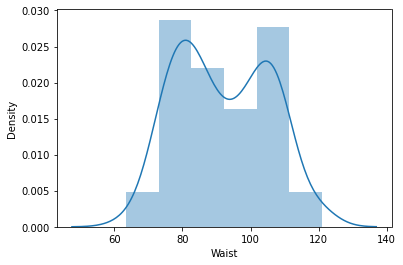

In [ ]:
import seaborn as sns
sns.distplot(data['Waist'])#density plot for daily -posititve skewness

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

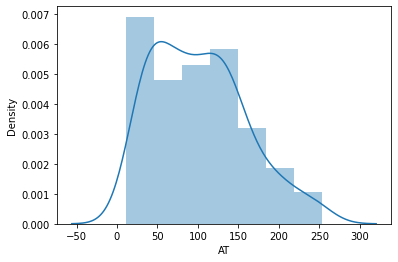

In [ ]:
import seaborn as sns
sns.distplot(data['AT'])#positive skewed data

# **Fitting linear Regression model**

In [ ]:
import statsmodels.formula.api as smf #model-Regression Model
model= smf.ols("AT~Waist",data = data).fit()#smf.ols is going to draw n no of lines and find distance between the points and gives the best fitted line as output
#"AT~Waist" "y~x" is how it's assigned

In [ ]:
#coefficients are B0 and B1
model.params
#reg.Equn: Sunday = B0+B1*daily
#in output:Intercept-B0,Waist-cofficient of Waist i.e B1
#AT= -215.981488 + 3.458859*Waist

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [ ]:
sun=-215.981488 + 3.458859*Waist
sun

In [ ]:
# r^2 values - 0.92 -good reg.equn
(model.rsquared,model.rsquared_adj)# so its a good one aalmost near to 1
#higher the r^2 value better the model

(0.670036893052843, 0.6669531256981966)

In [ ]:
#model.summary() #ols- ordinary least square


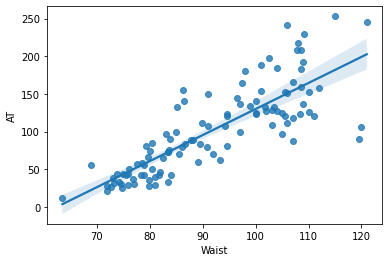

In [ ]:
sns.regplot(x='Waist', y='AT',data=data);#regression plot

In [ ]:
# t and p values
print(model.tvalues,'\n',model.pvalues)


Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [ ]:
#1100 manual calculation
(1.3*1100)+13.835630

1443.83563

In [ ]:
#predict value for 150,240

# **Predict for new Data point**

In [ ]:
#predict for 200 and 300 daily circulation
newdata=pd.Series([40,75,20])#x values is (daily circulation )200 at one branch and 300 at another

In [ ]:
newdata

0    40
1    75
2    20
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [ ]:
data_pred

,Waist
0,40
1,75
2,20


In [ ]:
model.predict(data_pred)# model -regression model
#HERE the output has - ve value which is wrong , but its -ve wrong because its value i.e 40 20 was not in the input dataset , to get trained while the 7o was in the range between the dataset
#and hence that gives perfect prediction than the other two non trained values

0    -77.627112
1     43.432966
2   -146.804300
dtype: float64